In [20]:
import bcolz
import pickle
import glob
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import xgboost as xgb
from keras.utils.np_utils import to_categorical

import numpy as np
from keras_squeezenet import SqueezeNet
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.preprocessing import image
from sklearn.model_selection import train_test_split

In [2]:

def save_array(fname, arr):
    c=bcolz.carray(arr, rootdir=fname, mode='w')
    c.flush()


def load_array(fname):
    return bcolz.open(fname)[:]


def save_pickle(fname, obj):
    with open(fname, "wb") as output_file:
        pickle.dump(obj, output_file)

def load_pickle(fname):
    with open(fname, "rb") as input_file:
        return pickle.load(input_file)

## Pre process

In [45]:
cd /mnt/kaggle_cats_dogs/

/mnt/kaggle_cats_dogs


In [47]:
#1 define data gen
#2 use it some how
## put it in fit genereator

In [48]:
datagen=ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [55]:
img = load_img('train/cats/cat.0.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1, save_to_dir='preview', save_prefix='cat', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

In [49]:
p=glob.glob('preview/*.*')
imgs=[img_to_array(load_img(im)) for im in p ]

In [44]:
p

NameError: name 'p' is not defined

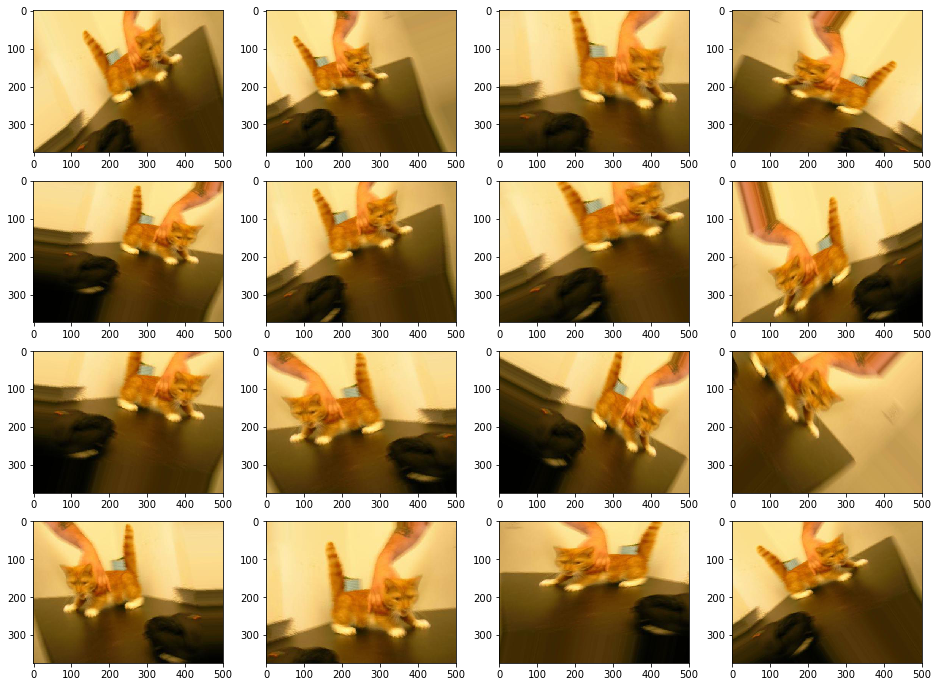

In [57]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
#show and tell

fig = plt.figure(figsize=(16,12))
n_images_per_row=4
choices=np.random.choice(100,16)
#choices=range(16)
for i,id in enumerate(choices):
    ax = fig.add_subplot(4,n_images_per_row,i+1)
    plt.imshow(imgs[i].astype('uint8'))

In [37]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])


In [ ]:
cd /mnt/kaggle_crevical/train/

In [38]:
batch_size = 16

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        '/mnt/kaggle_crevical/train/',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        '/mnt/kaggle_crevical/train/',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 7626 images belonging to 3 classes.
Found 7626 images belonging to 3 classes.


In [40]:
model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=800 // batch_size)

Epoch 1/50
125/125 [==============================] - 538s - loss: -1.6653 - acc: 0.5105 - val_loss: -2.1124 - val_acc: 0.5225
Epoch 2/50
125/125 [==============================] - 509s - loss: -1.9450 - acc: 0.5170 - val_loss: -2.1522 - val_acc: 0.5100
Epoch 3/50
125/125 [==============================] - 509s - loss: -1.7457 - acc: 0.5125 - val_loss: -2.1721 - val_acc: 0.5138
Epoch 4/50
 32/125 [======>.......................] - ETA: 195s - loss: -2.5221 - acc: 0.5020

Exception in thread Thread-25:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ubuntu/anaconda3/lib/python3.6/site-packages/keras/engine/training.py", line 612, in data_generator_task
    generator_output = next(self._generator)
  File "/home/ubuntu/anaconda3/lib/python3.6/site-packages/keras/preprocessing/image.py", line 727, in __next__
    return self.next(*args, **kwargs)
  File "/home/ubuntu/anaconda3/lib/python3.6/site-packages/keras/preprocessing/image.py", line 960, in next
    target_size=self.target_size)
  File "/home/ubuntu/anaconda3/lib/python3.6/site-packages/keras/preprocessing/image.py", line 330, in load_img
    img = img.resize(hw_tuple)
  File "/home/ubuntu/anaconda3/lib/python3.6/site-packages/PIL/Image.py", line 1541, in resize
    self.loa

ValueError: output of generator should be a tuple `(x, y, sample_weight)` or `(x, y)`. Found: None

## VGG

In [30]:
from keras.applications.vgg16 import VGG16
model=VGG16()

In [33]:
generator = datagen.flow_from_directory(
        'train',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode=None,  # this means our generator will only yield batches of data, no labels
        shuffle=False)

Found 25000 images belonging to 2 classes.


In [32]:
batch_size = 16

generator = datagen.flow_from_directory(
        'train',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode=None,  # this means our generator will only yield batches of data, no labels
        shuffle=False)  # our data will be in order, so all first 1000 images will be cats, then 1000 dogs
# the predict_generator method returns the output of a model, given
# a generator that yields batches of numpy data

# save the output as a Numpy array
np.save(open('bottleneck_features_train.npy', 'w'), bottleneck_features_train)

generator = datagen.flow_from_directory(
        'train',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
bottleneck_features_validation = model.predict_generator(generator, 800)
np.save(open('bottleneck_features_validation.npy', 'w'), bottleneck_features_validation)

Found 25000 images belonging to 2 classes.


TypeError: write() argument must be str, not bytes

In [ ]:
bottleneck_features_train = model.predict_generator(generator, 2000)

In [ ]:
# build a classifier model to put on top of the convolutional model
top_model = Sequential()
top_model.add(Flatten(input_shape=model.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(1, activation='sigmoid'))

# note that it is necessary to start with a fully-trained
# classifier, including the top classifier,
# in order to successfully do fine-tuning
top_model.load_weights(top_model_weights_path)

# add the model on top of the convolutional base
model.add(top_model)

## squeezenet

In [7]:
cd /mnt/kaggle_cats_dogs/

/mnt/kaggle_cats_dogs


In [23]:
cd train

/mnt/kaggle_cats_dogs/train


In [8]:
p=glob.glob('preview/*.*')
imgs=[img_to_array(load_img(im)) for im in p ]

In [24]:
ls

cats/  dogs/


In [23]:


model = SqueezeNet()

img = np.resize(imgs[0],(227,227,3))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print('Predicted:', decode_predictions(preds))

Predicted: [[('n03992509', "potter's_wheel", 0.25048083), ('n02526121', 'eel', 0.14700426), ('n01955084', 'chiton', 0.087953709), ('n01484850', 'great_white_shark', 0.038968898), ('n07714571', 'head_cabbage', 0.036979694)]]


In [15]:
#read all cats dogs
#predict
#do xgboost
g=glob.glob('train/*/*.*')

In [18]:
imgs=[img_to_array(load_img(im,target_size=(227,227))) for im in g ]
np.array(imgs)
y=[im.split('/')[-1].split('.')[0] for im in g ]

In [28]:
preds = model.predict(imgs)

In [ ]:
#lets do as chollect... only 2000+400 images

In [88]:
y_new=[1 if i=='dog' else 0 for i in y_new]

In [58]:
imgs_new=np.concatenate((imgs[:1500],imgs[12500:14000]),axis=0)


In [81]:
y_new=np.append(y[:1500],y[12500:14000])

In [93]:

trn,val,y_trn,y_val=train_test_split(imgs_new,y_new)

In [94]:
preds_trn = model.predict(trn)
preds_val = model.predict(val)

In [95]:
clf = xgb.XGBClassifier(max_depth=10, n_estimators=1500,min_child_weight=9,learning_rate=0.01,
                       nthread=8, subsample=0.80,colsample_bytree=0.80,seed=4242)


clf.fit(preds_trn , y_trn,eval_set=[(preds_val, y_val)], eval_metric='logloss', verbose=True, early_stopping_rounds=50)

[0]	validation_0-logloss:0.685943
Will train until validation_0-logloss hasn't improved in 50 rounds.
[1]	validation_0-logloss:0.67885
[2]	validation_0-logloss:0.671783
[3]	validation_0-logloss:0.664944
[4]	validation_0-logloss:0.658382
[5]	validation_0-logloss:0.651664
[6]	validation_0-logloss:0.645425
[7]	validation_0-logloss:0.639258
[8]	validation_0-logloss:0.633349
[9]	validation_0-logloss:0.627514
[10]	validation_0-logloss:0.621729
[11]	validation_0-logloss:0.615968
[12]	validation_0-logloss:0.609974
[13]	validation_0-logloss:0.604291
[14]	validation_0-logloss:0.598839
[15]	validation_0-logloss:0.59345
[16]	validation_0-logloss:0.588093
[17]	validation_0-logloss:0.582719
[18]	validation_0-logloss:0.577401
[19]	validation_0-logloss:0.572474
[20]	validation_0-logloss:0.567504
[21]	validation_0-logloss:0.562499
[22]	validation_0-logloss:0.55767
[23]	validation_0-logloss:0.552913
[24]	validation_0-logloss:0.548108
[25]	validation_0-logloss:0.543357
[26]	validation_0-logloss:0.538848


[230]	validation_0-logloss:0.204121
[231]	validation_0-logloss:0.203629
[232]	validation_0-logloss:0.203159
[233]	validation_0-logloss:0.202765
[234]	validation_0-logloss:0.202212
[235]	validation_0-logloss:0.20181
[236]	validation_0-logloss:0.201354
[237]	validation_0-logloss:0.200841
[238]	validation_0-logloss:0.200399
[239]	validation_0-logloss:0.199951
[240]	validation_0-logloss:0.19957
[241]	validation_0-logloss:0.199135
[242]	validation_0-logloss:0.198795
[243]	validation_0-logloss:0.198346
[244]	validation_0-logloss:0.197917
[245]	validation_0-logloss:0.197453
[246]	validation_0-logloss:0.196971
[247]	validation_0-logloss:0.196588
[248]	validation_0-logloss:0.196161
[249]	validation_0-logloss:0.195735
[250]	validation_0-logloss:0.195301
[251]	validation_0-logloss:0.194961
[252]	validation_0-logloss:0.194485
[253]	validation_0-logloss:0.19417
[254]	validation_0-logloss:0.193735
[255]	validation_0-logloss:0.193315
[256]	validation_0-logloss:0.192953
[257]	validation_0-logloss:0.19

[459]	validation_0-logloss:0.152786
[460]	validation_0-logloss:0.152654
[461]	validation_0-logloss:0.152531
[462]	validation_0-logloss:0.152401
[463]	validation_0-logloss:0.152314
[464]	validation_0-logloss:0.152173
[465]	validation_0-logloss:0.152205
[466]	validation_0-logloss:0.152085
[467]	validation_0-logloss:0.152033
[468]	validation_0-logloss:0.151949
[469]	validation_0-logloss:0.151832
[470]	validation_0-logloss:0.151783
[471]	validation_0-logloss:0.151705
[472]	validation_0-logloss:0.151654
[473]	validation_0-logloss:0.151606
[474]	validation_0-logloss:0.151592
[475]	validation_0-logloss:0.151524
[476]	validation_0-logloss:0.151473
[477]	validation_0-logloss:0.151419
[478]	validation_0-logloss:0.151365
[479]	validation_0-logloss:0.151273
[480]	validation_0-logloss:0.151263
[481]	validation_0-logloss:0.151291
[482]	validation_0-logloss:0.151179
[483]	validation_0-logloss:0.151068
[484]	validation_0-logloss:0.150926
[485]	validation_0-logloss:0.150864
[486]	validation_0-logloss:0

[688]	validation_0-logloss:0.141962
[689]	validation_0-logloss:0.141891
[690]	validation_0-logloss:0.141874
[691]	validation_0-logloss:0.141833
[692]	validation_0-logloss:0.141809
[693]	validation_0-logloss:0.141756
[694]	validation_0-logloss:0.141714
[695]	validation_0-logloss:0.141692
[696]	validation_0-logloss:0.141714
[697]	validation_0-logloss:0.141684
[698]	validation_0-logloss:0.141629
[699]	validation_0-logloss:0.141551
[700]	validation_0-logloss:0.141492
[701]	validation_0-logloss:0.141439
[702]	validation_0-logloss:0.141414
[703]	validation_0-logloss:0.141349
[704]	validation_0-logloss:0.141297
[705]	validation_0-logloss:0.141247
[706]	validation_0-logloss:0.141241
[707]	validation_0-logloss:0.14124
[708]	validation_0-logloss:0.141224
[709]	validation_0-logloss:0.141208
[710]	validation_0-logloss:0.141239
[711]	validation_0-logloss:0.141219
[712]	validation_0-logloss:0.141157
[713]	validation_0-logloss:0.141073
[714]	validation_0-logloss:0.141055
[715]	validation_0-logloss:0.

[917]	validation_0-logloss:0.137761
[918]	validation_0-logloss:0.137713
[919]	validation_0-logloss:0.137677
[920]	validation_0-logloss:0.137664
[921]	validation_0-logloss:0.137627
[922]	validation_0-logloss:0.137601
[923]	validation_0-logloss:0.137593
[924]	validation_0-logloss:0.137556
[925]	validation_0-logloss:0.137589
[926]	validation_0-logloss:0.137611
[927]	validation_0-logloss:0.137584
[928]	validation_0-logloss:0.137619
[929]	validation_0-logloss:0.137606
[930]	validation_0-logloss:0.137556
[931]	validation_0-logloss:0.13759
[932]	validation_0-logloss:0.137583
[933]	validation_0-logloss:0.13753
[934]	validation_0-logloss:0.137529
[935]	validation_0-logloss:0.137523
[936]	validation_0-logloss:0.137518
[937]	validation_0-logloss:0.13749
[938]	validation_0-logloss:0.137483
[939]	validation_0-logloss:0.137466
[940]	validation_0-logloss:0.137482
[941]	validation_0-logloss:0.137431
[942]	validation_0-logloss:0.137428
[943]	validation_0-logloss:0.137433
[944]	validation_0-logloss:0.13

[1142]	validation_0-logloss:0.136007
[1143]	validation_0-logloss:0.135978
[1144]	validation_0-logloss:0.135984
[1145]	validation_0-logloss:0.135996
[1146]	validation_0-logloss:0.135954
[1147]	validation_0-logloss:0.135986
[1148]	validation_0-logloss:0.135987
[1149]	validation_0-logloss:0.136031
[1150]	validation_0-logloss:0.136032
[1151]	validation_0-logloss:0.136074
[1152]	validation_0-logloss:0.136071
[1153]	validation_0-logloss:0.136055
[1154]	validation_0-logloss:0.136032
[1155]	validation_0-logloss:0.13603
[1156]	validation_0-logloss:0.136051
[1157]	validation_0-logloss:0.13607
[1158]	validation_0-logloss:0.136034
[1159]	validation_0-logloss:0.136055
[1160]	validation_0-logloss:0.136029
[1161]	validation_0-logloss:0.136006
[1162]	validation_0-logloss:0.135969
[1163]	validation_0-logloss:0.135963
[1164]	validation_0-logloss:0.135956
[1165]	validation_0-logloss:0.13597
[1166]	validation_0-logloss:0.135944
[1167]	validation_0-logloss:0.13595
[1168]	validation_0-logloss:0.135964
[1169

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.01, max_delta_step=0, max_depth=10,
       min_child_weight=9, missing=None, n_estimators=1500, nthread=8,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=4242, silent=True, subsample=0.8)

In [98]:
len(y_val)

750

In [97]:
np.sum(np.abs(clf.predict(preds_val)-y_val))/len(y_val)

0.053333333333333337

### generator

In [177]:
#defs
images_num=1500
augmentations=[]
augmentation_factor=6

In [178]:
datagen = ImageDataGenerator(
        #rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
)

In [179]:
flow_trn=trn[:images_num]
flow_y=y_trn[:images_num]

In [180]:
new_imgs=[]
new_y=[]
for i,j in enumerate(datagen.flow(flow_trn,flow_y, batch_size=1)):
    x,y=j
    new_imgs.append(x)
    new_y.append(y)
    
    if i>images_num*augmentation_factor:
        break

In [181]:
new_imgs=np.array(new_imgs)
new_imgs=new_imgs[:,0,:,:,:]
new_y=np.array(new_y)[:,0]

In [182]:
new_preds=model.predict(new_imgs)

In [183]:
new_imgs.shape,new_preds.shape

((9002, 227, 227, 3), (9002, 1000))

In [184]:
clf = xgb.XGBClassifier(max_depth=10, n_estimators=1500,min_child_weight=9,learning_rate=0.01,
                       nthread=8, subsample=0.80,colsample_bytree=0.80,seed=4242)


clf.fit(new_preds , new_y,eval_set=[(preds_val, y_val)], eval_metric='logloss', verbose=True, early_stopping_rounds=50)

[0]	validation_0-logloss:0.685918
Will train until validation_0-logloss hasn't improved in 50 rounds.
[1]	validation_0-logloss:0.67874
[2]	validation_0-logloss:0.671516
[3]	validation_0-logloss:0.664717
[4]	validation_0-logloss:0.658026
[5]	validation_0-logloss:0.651307
[6]	validation_0-logloss:0.644723
[7]	validation_0-logloss:0.638208
[8]	validation_0-logloss:0.632038
[9]	validation_0-logloss:0.625777
[10]	validation_0-logloss:0.619775
[11]	validation_0-logloss:0.613925
[12]	validation_0-logloss:0.608181
[13]	validation_0-logloss:0.60249
[14]	validation_0-logloss:0.596964
[15]	validation_0-logloss:0.591312
[16]	validation_0-logloss:0.58574
[17]	validation_0-logloss:0.580294
[18]	validation_0-logloss:0.575062
[19]	validation_0-logloss:0.569866
[20]	validation_0-logloss:0.564849
[21]	validation_0-logloss:0.559784
[22]	validation_0-logloss:0.554975
[23]	validation_0-logloss:0.550227
[24]	validation_0-logloss:0.545344
[25]	validation_0-logloss:0.540284
[26]	validation_0-logloss:0.535648


[230]	validation_0-logloss:0.193359
[231]	validation_0-logloss:0.192833
[232]	validation_0-logloss:0.192392
[233]	validation_0-logloss:0.191826
[234]	validation_0-logloss:0.191306
[235]	validation_0-logloss:0.190796
[236]	validation_0-logloss:0.190344
[237]	validation_0-logloss:0.189999
[238]	validation_0-logloss:0.189596
[239]	validation_0-logloss:0.189134
[240]	validation_0-logloss:0.188657
[241]	validation_0-logloss:0.188246
[242]	validation_0-logloss:0.187809
[243]	validation_0-logloss:0.187349
[244]	validation_0-logloss:0.186985
[245]	validation_0-logloss:0.186576
[246]	validation_0-logloss:0.186138
[247]	validation_0-logloss:0.185662
[248]	validation_0-logloss:0.185252
[249]	validation_0-logloss:0.184902
[250]	validation_0-logloss:0.184467
[251]	validation_0-logloss:0.184104
[252]	validation_0-logloss:0.183731
[253]	validation_0-logloss:0.183339
[254]	validation_0-logloss:0.182918
[255]	validation_0-logloss:0.182524
[256]	validation_0-logloss:0.182133
[257]	validation_0-logloss:0

[459]	validation_0-logloss:0.144061
[460]	validation_0-logloss:0.144016
[461]	validation_0-logloss:0.144058
[462]	validation_0-logloss:0.143921
[463]	validation_0-logloss:0.143886
[464]	validation_0-logloss:0.143872
[465]	validation_0-logloss:0.143819
[466]	validation_0-logloss:0.143699
[467]	validation_0-logloss:0.143647
[468]	validation_0-logloss:0.143581
[469]	validation_0-logloss:0.143536
[470]	validation_0-logloss:0.143516
[471]	validation_0-logloss:0.143458
[472]	validation_0-logloss:0.143326
[473]	validation_0-logloss:0.143295
[474]	validation_0-logloss:0.143244
[475]	validation_0-logloss:0.143269
[476]	validation_0-logloss:0.143182
[477]	validation_0-logloss:0.143119
[478]	validation_0-logloss:0.143076
[479]	validation_0-logloss:0.143042
[480]	validation_0-logloss:0.142952
[481]	validation_0-logloss:0.142883
[482]	validation_0-logloss:0.142862
[483]	validation_0-logloss:0.142766
[484]	validation_0-logloss:0.14274
[485]	validation_0-logloss:0.14268
[486]	validation_0-logloss:0.1

[688]	validation_0-logloss:0.134196
[689]	validation_0-logloss:0.134253
[690]	validation_0-logloss:0.134228
[691]	validation_0-logloss:0.134261
[692]	validation_0-logloss:0.134212
[693]	validation_0-logloss:0.134186
[694]	validation_0-logloss:0.134132
[695]	validation_0-logloss:0.134138
[696]	validation_0-logloss:0.134092
[697]	validation_0-logloss:0.13405
[698]	validation_0-logloss:0.133972
[699]	validation_0-logloss:0.133874
[700]	validation_0-logloss:0.133877
[701]	validation_0-logloss:0.133902
[702]	validation_0-logloss:0.133844
[703]	validation_0-logloss:0.133756
[704]	validation_0-logloss:0.133713
[705]	validation_0-logloss:0.133732
[706]	validation_0-logloss:0.133734
[707]	validation_0-logloss:0.133701
[708]	validation_0-logloss:0.133642
[709]	validation_0-logloss:0.133601
[710]	validation_0-logloss:0.13356
[711]	validation_0-logloss:0.133586
[712]	validation_0-logloss:0.133571
[713]	validation_0-logloss:0.133559
[714]	validation_0-logloss:0.133547
[715]	validation_0-logloss:0.1

[917]	validation_0-logloss:0.131266
[918]	validation_0-logloss:0.131225
[919]	validation_0-logloss:0.131193
[920]	validation_0-logloss:0.131155
[921]	validation_0-logloss:0.131175
[922]	validation_0-logloss:0.131182
[923]	validation_0-logloss:0.131148
[924]	validation_0-logloss:0.131114
[925]	validation_0-logloss:0.131096
[926]	validation_0-logloss:0.131075
[927]	validation_0-logloss:0.131103
[928]	validation_0-logloss:0.131085
[929]	validation_0-logloss:0.131076
[930]	validation_0-logloss:0.131008
[931]	validation_0-logloss:0.131
[932]	validation_0-logloss:0.131005
[933]	validation_0-logloss:0.13103
[934]	validation_0-logloss:0.131042
[935]	validation_0-logloss:0.131019
[936]	validation_0-logloss:0.131023
[937]	validation_0-logloss:0.130973
[938]	validation_0-logloss:0.130953
[939]	validation_0-logloss:0.130891
[940]	validation_0-logloss:0.130923
[941]	validation_0-logloss:0.130916
[942]	validation_0-logloss:0.130978
[943]	validation_0-logloss:0.130957
[944]	validation_0-logloss:0.130

[1142]	validation_0-logloss:0.130049
[1143]	validation_0-logloss:0.130052
[1144]	validation_0-logloss:0.130027
[1145]	validation_0-logloss:0.130011
[1146]	validation_0-logloss:0.130038
[1147]	validation_0-logloss:0.130055
[1148]	validation_0-logloss:0.130038
[1149]	validation_0-logloss:0.13003
[1150]	validation_0-logloss:0.130018
[1151]	validation_0-logloss:0.13001
[1152]	validation_0-logloss:0.130046
[1153]	validation_0-logloss:0.130053
[1154]	validation_0-logloss:0.130073
[1155]	validation_0-logloss:0.130038
[1156]	validation_0-logloss:0.130036
[1157]	validation_0-logloss:0.130004
[1158]	validation_0-logloss:0.129994
[1159]	validation_0-logloss:0.129941
[1160]	validation_0-logloss:0.129956
[1161]	validation_0-logloss:0.129949
[1162]	validation_0-logloss:0.129963
[1163]	validation_0-logloss:0.129953
[1164]	validation_0-logloss:0.12996
[1165]	validation_0-logloss:0.129957
[1166]	validation_0-logloss:0.129953
[1167]	validation_0-logloss:0.129902
[1168]	validation_0-logloss:0.129864
[116

[1365]	validation_0-logloss:0.129366
[1366]	validation_0-logloss:0.12939
[1367]	validation_0-logloss:0.129379
[1368]	validation_0-logloss:0.129361
[1369]	validation_0-logloss:0.129346
[1370]	validation_0-logloss:0.129331
[1371]	validation_0-logloss:0.129385
[1372]	validation_0-logloss:0.129368
[1373]	validation_0-logloss:0.129351
[1374]	validation_0-logloss:0.129342
Stopping. Best iteration:
[1324]	validation_0-logloss:0.12918



XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.01, max_delta_step=0, max_depth=10,
       min_child_weight=9, missing=None, n_estimators=1500, nthread=8,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=4242, silent=True, subsample=0.8)

In [ ]:
# 1500, no aug: 13.55
# 1000 no aug 16
# 1000 some aug 14.8
# 1500 some aug - 12.9

## cervical

In [3]:
cd /mnt/kaggle_crevical/thin_dataset/

/mnt/kaggle_crevical/thin_dataset


In [4]:
g=glob.glob('train/*/*.jpg')

In [6]:
g=glob.glob('/mnt/kaggle_crevical/thin_dataset/train/*/*.*')

In [12]:
imgs=[]
type_list=[]

for i,file in enumerate(g):
    try:
        imgs.append(image.img_to_array(image.load_img(file).resize([227,227])))
        type_list.append(file.split('/')[-2])
    except:
        print (i,file,' seems corrupt')
    if i % 250 ==0:
        print (i)

imgs=np.array(imgs)


0
9 /mnt/kaggle_crevical/thin_dataset/train/Type_1/1339.jpg  seems corrupt
250
500
750
1000
1250


In [14]:
type_1_idx=np.array([i=='Type_1' for i in type_list])
type_2_idx=np.array([i=='Type_2' for i in type_list])
type_3_idx=np.array([i=='Type_3' for i in type_list])
y=type_1_idx*1+type_2_idx*2+type_3_idx*3

In [17]:
cd ..

/mnt/kaggle_crevical


In [18]:
save_array('shrunk_files/data_thin_227',imgs)
save_pickle('shrunk_files/y_thin',y)

In [21]:
trn,val,y_trn,y_val=train_test_split(imgs,y)

In [24]:
preds_trn = model.predict(trn)
preds_val = model.predict(val)

In [25]:
clf = xgb.XGBClassifier(max_depth=10, n_estimators=1500,min_child_weight=9,learning_rate=0.01,
                       nthread=8, subsample=0.80,colsample_bytree=0.80,seed=4242)


clf.fit(preds_trn , y_trn,eval_set=[(preds_val, y_val)], eval_metric='mlogloss', verbose=True, early_stopping_rounds=50)

[0]	validation_0-mlogloss:1.09625
Will train until validation_0-mlogloss hasn't improved in 50 rounds.
[1]	validation_0-mlogloss:1.09432
[2]	validation_0-mlogloss:1.09257
[3]	validation_0-mlogloss:1.09078
[4]	validation_0-mlogloss:1.08869
[5]	validation_0-mlogloss:1.08677
[6]	validation_0-mlogloss:1.08455
[7]	validation_0-mlogloss:1.08281
[8]	validation_0-mlogloss:1.0808
[9]	validation_0-mlogloss:1.07899
[10]	validation_0-mlogloss:1.07743
[11]	validation_0-mlogloss:1.0754
[12]	validation_0-mlogloss:1.07366
[13]	validation_0-mlogloss:1.0718
[14]	validation_0-mlogloss:1.06958
[15]	validation_0-mlogloss:1.06756
[16]	validation_0-mlogloss:1.06577
[17]	validation_0-mlogloss:1.06379
[18]	validation_0-mlogloss:1.062
[19]	validation_0-mlogloss:1.06025
[20]	validation_0-mlogloss:1.05873
[21]	validation_0-mlogloss:1.057
[22]	validation_0-mlogloss:1.0555
[23]	validation_0-mlogloss:1.05359
[24]	validation_0-mlogloss:1.05209
[25]	validation_0-mlogloss:1.0501
[26]	validation_0-mlogloss:1.04785
[27]	

[226]	validation_0-mlogloss:0.927387
[227]	validation_0-mlogloss:0.926988
[228]	validation_0-mlogloss:0.927023
[229]	validation_0-mlogloss:0.926989
[230]	validation_0-mlogloss:0.926933
[231]	validation_0-mlogloss:0.92676
[232]	validation_0-mlogloss:0.92663
[233]	validation_0-mlogloss:0.926456
[234]	validation_0-mlogloss:0.926536
[235]	validation_0-mlogloss:0.926228
[236]	validation_0-mlogloss:0.925866
[237]	validation_0-mlogloss:0.925802
[238]	validation_0-mlogloss:0.925693
[239]	validation_0-mlogloss:0.925575
[240]	validation_0-mlogloss:0.925535
[241]	validation_0-mlogloss:0.925412
[242]	validation_0-mlogloss:0.925403
[243]	validation_0-mlogloss:0.925031
[244]	validation_0-mlogloss:0.924993
[245]	validation_0-mlogloss:0.924556
[246]	validation_0-mlogloss:0.924426
[247]	validation_0-mlogloss:0.923982
[248]	validation_0-mlogloss:0.923869
[249]	validation_0-mlogloss:0.923595
[250]	validation_0-mlogloss:0.923403
[251]	validation_0-mlogloss:0.923439
[252]	validation_0-mlogloss:0.923472
[25

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.01, max_delta_step=0, max_depth=10,
       min_child_weight=9, missing=None, n_estimators=1500, nthread=8,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=4242, silent=True, subsample=0.8)